In [228]:
#https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
#Read in data in CSV format
df = pd.read_csv("ds_salaries.csv")

<font size="6">Data Exploration

In [231]:
df.head(20)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [233]:
df.shape

(607, 12)

In [234]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

<font size="6">Data Cleaning

In [236]:
df.isnull().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [237]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

<font size="6">Exploratory Data Analysis

In [239]:
df['experience_level'] = df['experience_level'].map({'EN':'Entry-level', 'MI':'Mid-level', 'SE':'Senior-level', 'EX':'Executive-level'})

Text(0.5, 1.0, 'Distribution Of Experience Level')

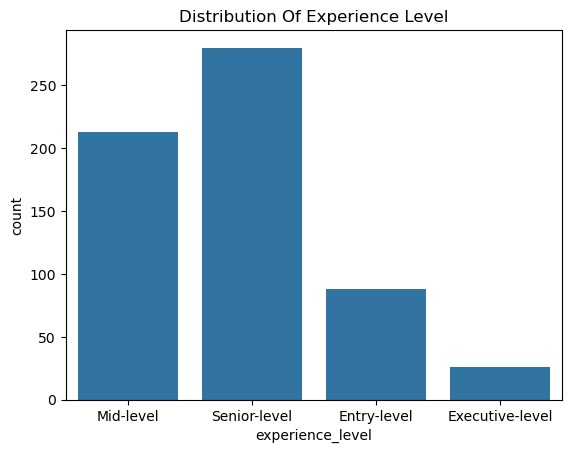

In [240]:
sns.countplot(data=df, x='experience_level')
plt.title("Distribution Of Experience Level")

Text(0.5, 1.0, 'Distribution Of Company Size')

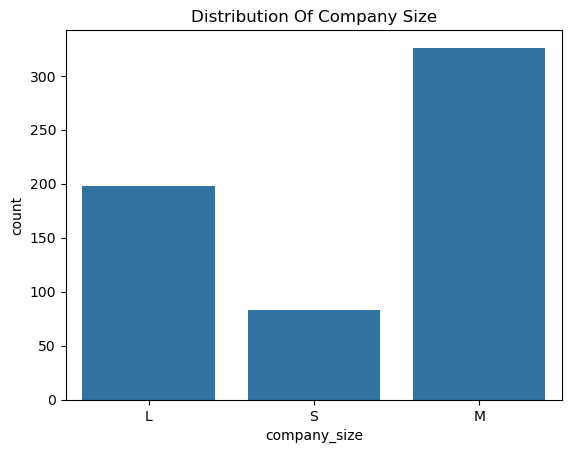

In [241]:
sns.countplot(data=df, x='company_size')
plt.title("Distribution Of Company Size")

In [242]:
df['employment_type'] = df['employment_type'].map({'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract', 'FL':'Freelance'})

Text(0.5, 1.0, 'Distribution Of Employment Type')

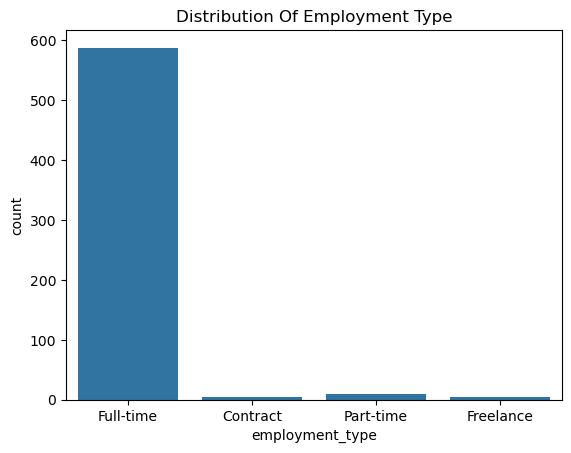

In [243]:
#The average number of people that worked for the company during the year: 
#S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)
sns.countplot(data=df, x='employment_type')
plt.title("Distribution Of Employment Type")

In [244]:
df['remote_ratio'] = df['remote_ratio'].map({100:'Fully-Remote', 50:'Partially-Remote', 0:'No-Remote-Work'})

Text(0.5, 1.0, 'Count Of Remote Ratio Distribution')

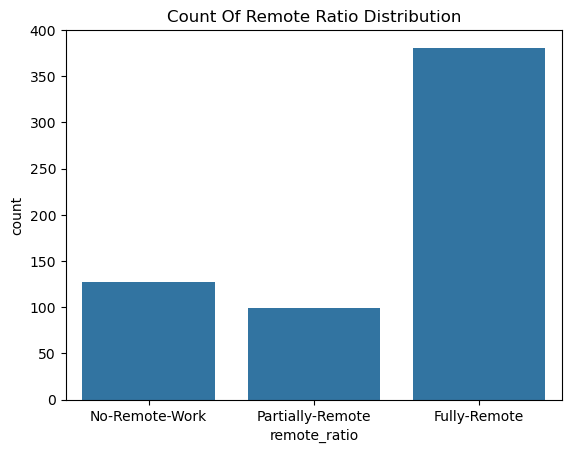

In [245]:
sns.countplot(data=df, x='remote_ratio')
plt.title("Count Of Remote Ratio Distribution")

In [246]:
avg_salaries_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
round(avg_salaries_by_title, 2)

job_title
Data Analytics Lead                         405000.00
Principal Data Engineer                     328333.33
Financial Data Analyst                      275000.00
Principal Data Scientist                    215242.43
Director of Data Science                    195074.00
Data Architect                              177873.91
Applied Data Scientist                      175655.00
Analytics Engineer                          175000.00
Data Specialist                             165000.00
Head of Data                                160162.60
Machine Learning Scientist                  158412.50
Data Science Manager                        158328.50
Director of Data Engineering                156738.00
Head of Data Science                        146718.75
Applied Machine Learning Scientist          142068.75
Lead Data Engineer                          139724.50
Data Analytics Manager                      127134.29
Cloud Data Engineer                         124647.00
Data Engineering M

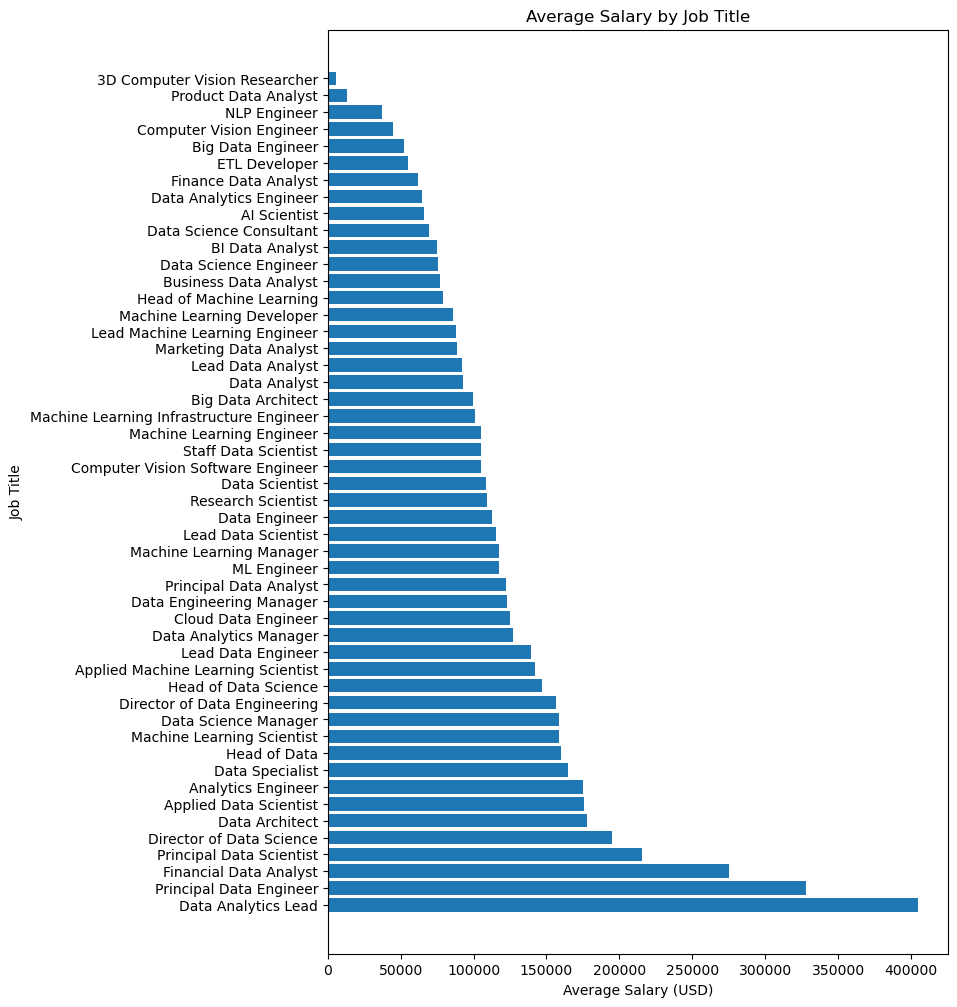

In [247]:
plt.figure(figsize=(8, 12))
plt.barh(avg_salaries_by_title.index, avg_salaries_by_title.values)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

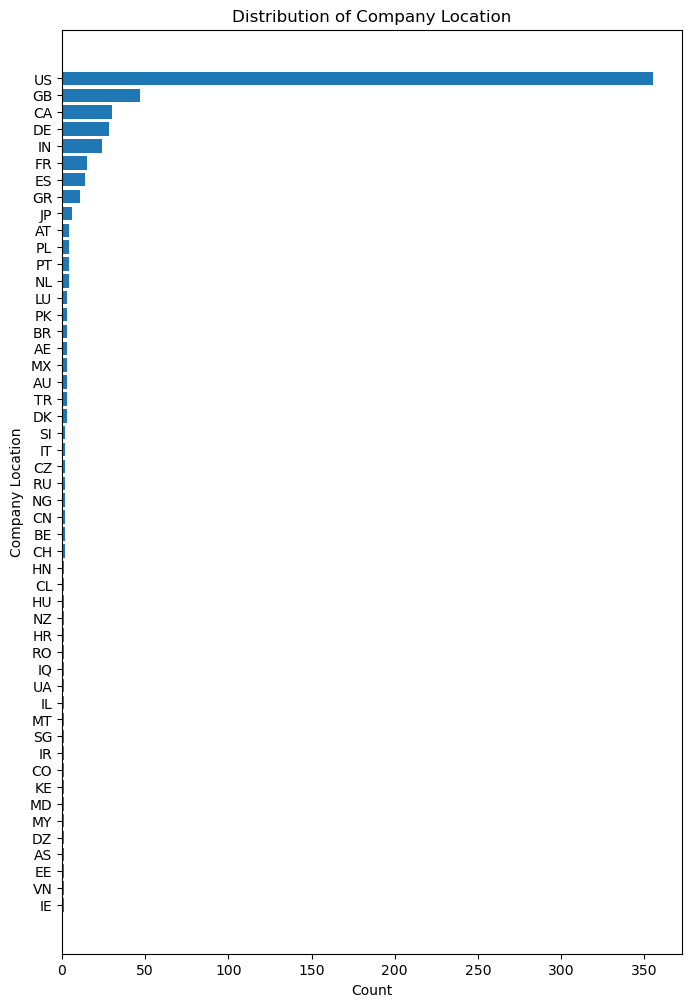

In [248]:
company_location_counts = df['company_location'].value_counts().sort_values()

plt.figure(figsize=(8, 12))
plt.barh(company_location_counts.index, company_location_counts.values)
plt.title('Distribution of Company Location')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.show()

In [249]:
avg_salaries_per_year = df.groupby('work_year')['salary_in_usd'].mean()
round(avg_salaries_per_year, 2)

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

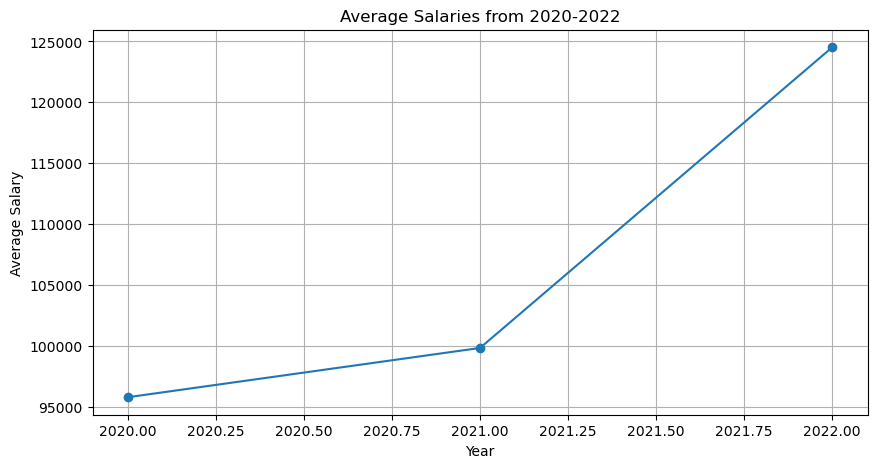

In [250]:
plt.figure(figsize=(10, 5))
plt.plot(avg_salaries_per_year.index, avg_salaries_per_year.values, marker='o', linestyle='-')
plt.title('Average Salaries from 2020-2022')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

In [251]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)
round(avg_salary_by_experience, 2)

experience_level
Entry-level         61643.32
Mid-level           87996.06
Senior-level       138617.29
Executive-level    199392.04
Name: salary_in_usd, dtype: float64

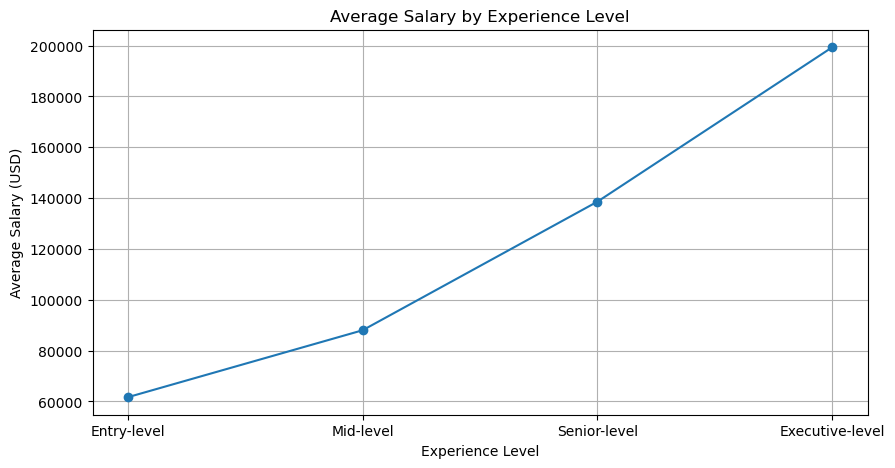

In [252]:
plt.figure(figsize=(10, 5))
plt.plot(avg_salary_by_experience.index, avg_salary_by_experience.values, marker='o', linestyle='-')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

In [253]:
avg_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=True)
round(avg_salary_by_employment_type, 2)

employment_type
Part-time     33070.50
Freelance     48000.00
Full-time    113468.07
Contract     184575.00
Name: salary_in_usd, dtype: float64

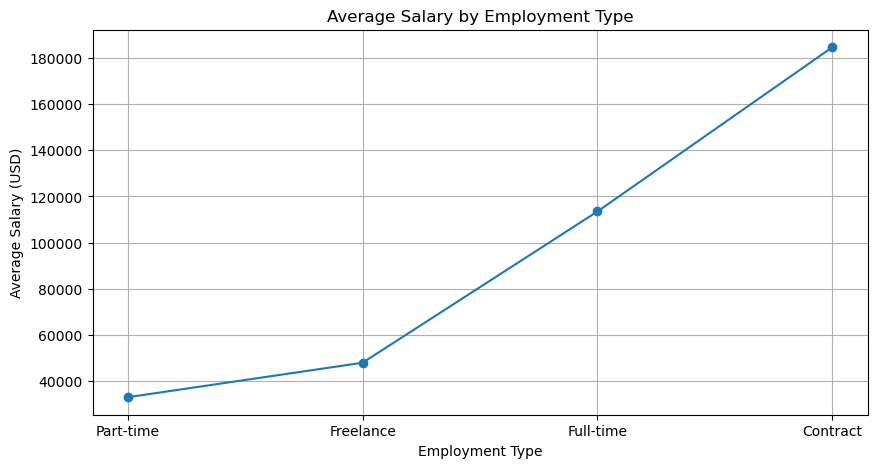

In [254]:
plt.figure(figsize=(10, 5))
plt.plot(avg_salary_by_employment_type.index, avg_salary_by_employment_type.values, marker='o', linestyle='-')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

In [255]:
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=True)
round(avg_salary_by_company_size, 2)

company_size
S     77632.67
M    116905.47
L    119242.99
Name: salary_in_usd, dtype: float64

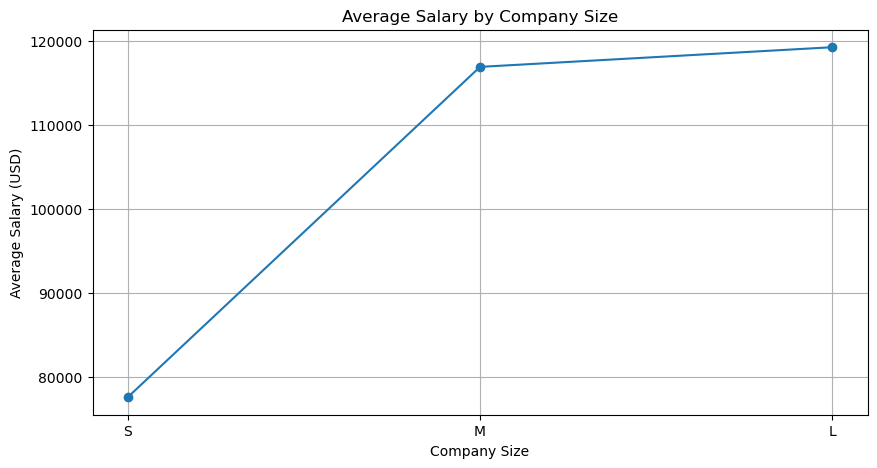

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(avg_salary_by_company_size.index, avg_salary_by_company_size.values, marker='o', linestyle='-')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()